In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Python/Python_repository/data/water.csv')

In [15]:
df[df['location'] == 'South'].count()

Unnamed: 0    26
location      26
town          26
mortality     26
hardness      26
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


<AxesSubplot:>

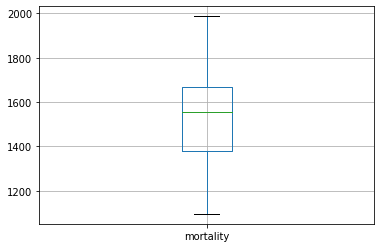

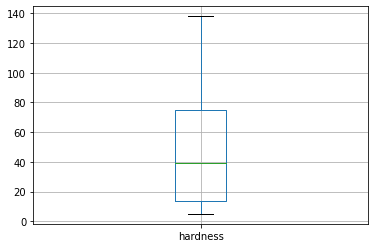

In [8]:
# Построим бок сплот, чтобы проверить наличие выбросов
df[['mortality']].plot(kind='box', grid=True)
df[['hardness']].plot(kind='box', grid=True)

### Scatter plot

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

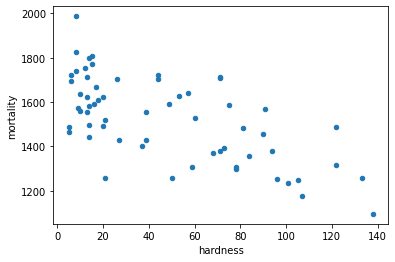

In [25]:
df.plot(kind='scatter', x='hardness', y='mortality')

### Корреляция

In [26]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [27]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [28]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


### Наблюдается обратная взаимосвять между показателями, т.у. чем выше жескость воды, тем ниже смертность. Какая-то странная зависимость?! При этом коэффициент корреляции Спирмана значительно больше коэф-та корреляции Кенделла

### Модель регрессии

In [29]:
X = df[['hardness']]
y = df['mortality']

In [32]:
# 20% на тестовую выборку, т.к. небольшой объем данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
X_train.shape

(48, 1)

In [34]:
y_train.shape

(48,)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.coef_

array([-3.28281845])

In [37]:
model.intercept_

1683.9212680875548

In [38]:
y_pred = model.predict(X_test)
y_pred

array([1339.22533049, 1651.09308355, 1637.96180974, 1539.47725614,
       1427.86142873, 1618.26489902, 1247.30641379, 1437.70988409,
       1614.98208057, 1664.22435737, 1490.23497934, 1418.01297337,
       1555.89134841])

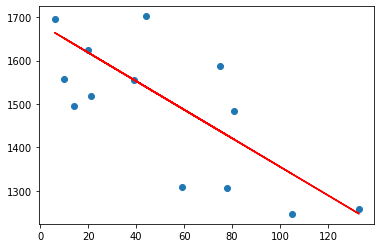

In [39]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Коэффициент детерминации

In [40]:
model.score(X_test, y_test)

0.5099679408034544

### График остатков

In [41]:
residuals = y_test-y_pred

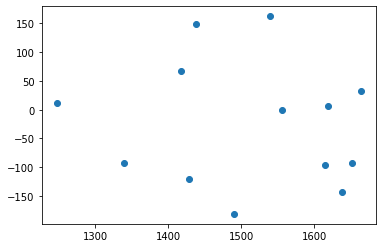

In [89]:
plt.scatter(y_pred, residuals)

### ВЫВОД
#### Исходя из результатов анализе не возможно сделать однозначного вывода т.к.
#### 1) Маленький объем выборки (всего 61 наблюдение)
#### 2) Низкий коэф. детерминации всего 0,5, что означает, что наша модель не очень объясняет зависимость между переменными. 
#### 3) Прослеживается какая-то закономерность в распределении остатков
#### 4) Регрессия плохо предсказывает значения, на графике видно, что тестовые x и y сильно отклоняются линии регрессии
#### 5) Смущает еще очень большое значение интерцептора (1683)

# Разделение датафрейма на 2 части

In [17]:
df_south = df[ df['location'] == 'South' ]
df_north = df[ df['location'] == 'North' ]

## Шаги для группы df_south

### Scatter plot

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

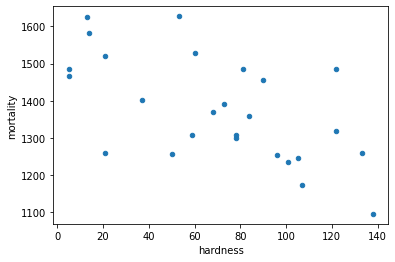

In [44]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

### Корреляция

In [45]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [46]:
df_south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


### Модель регрессии

In [47]:
X_1 = df_south[['hardness']]
y_1 = df_south['mortality']

In [59]:
# 10% на тестовую выборку, т.к. небольшой объем данных и коэф.дет будет положительный
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.10, random_state=42)

In [60]:
X_1_train.shape

(23, 1)

In [61]:
y_1_train.shape

(23,)

In [62]:
model_1 = LinearRegression()
model_1.fit(X_1_train, y_1_train)

LinearRegression()

In [63]:
model_1.coef_

array([-2.1645425])

In [64]:
model_1.intercept_

1529.143749365289

In [65]:
y_1_pred = model_1.predict(X_1_test)
y_1_pred

array([1265.06956433, 1518.32103686, 1301.86678684])

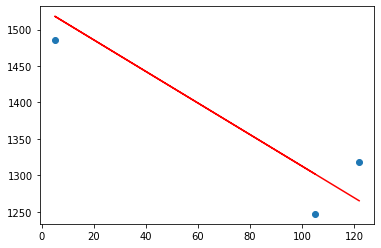

In [66]:
plt.scatter(X_1_test, y_1_test)
plt.plot(X_1_test, y_1_pred, c='r')

### Коэффициент детерминации

In [67]:
model_1.score(X_1_test, y_1_test)

0.7724212353112103

### График остатков

In [68]:
residuals_1 = y_1_test-y_1_pred

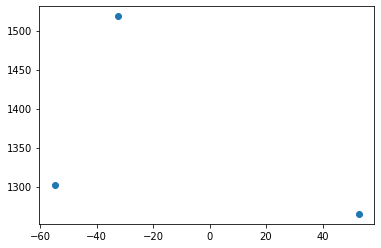

In [69]:
plt.scatter(residuals_1,y_1_pred)

# ВЫВОД

### Не могу одназначно сказать, есть ли зависимость в т.ч. при разделении на штаты, т.к.
#### 1) При разделении датасета на 2 группы вырос коэф.детерминации до 0,77, что вроде как говорит, что модель хорошо объясняет связь между переменными. Меня смущает маленький объем выборки и большой коэф.детерминации при этом.  
#### 2) Значения коф.корреляции почти не изменились
#### 3) Невозможно одназначно сказать как распределены остатки, учитывая их небольшое кол-во

## Шаги для группы df_north

### Scatter plot

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

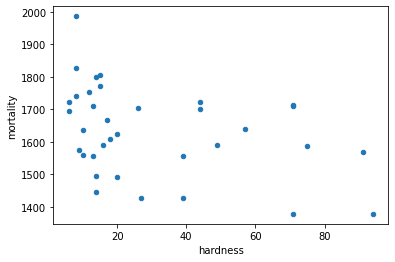

In [70]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

### Корреляция

In [71]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [72]:
df_north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


### Модель регрессии

In [18]:
X_2 = df_north[['hardness']]
y_2 = df_north['mortality']

In [19]:
# 10% на тестовую выборку, т.к. небольшой объем данных и коэф.дет будет положительный
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.10, random_state=42)

In [20]:
X_2_train.shape

(31, 1)

In [21]:
y_2_train.shape

(31,)

In [22]:
model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [23]:
model_2.coef_

array([-1.822715])

In [24]:
model_2.intercept_

1687.7073646127963

In [25]:
y_2_pred = model_2.predict(X_2_test)
y_2_pred

array([1673.12564463, 1671.30292963, 1662.18935464, 1676.77107462])

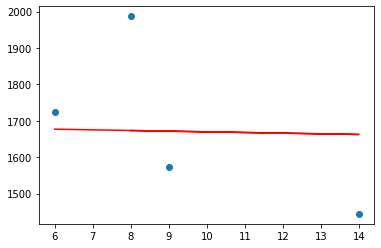

In [26]:
plt.scatter(X_2_test, y_2_test)
plt.plot(X_2_test, y_2_pred, c='r')

### Коэффициент детерминации

In [27]:
model_2.score(X_2_test, y_2_test)

0.032340393386281474

### График остатков

In [28]:
residuals_2 = y_2_test-y_2_pred

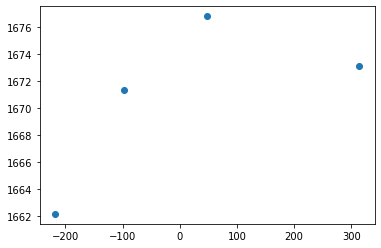

In [30]:
plt.scatter(residuals_2,y_2_pred)

# ВЫВОД

### Модель совершенно не объясняет зависимость между переменными для жителей Северных штатов, т.к. очень низкий (коэф.детер = 0,03) и линия регрессии почти что горизонтальная линия, т.е. получается, что для любого уровня жесткости воды будет один уровень среднегодовой смертности